In [22]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

In [25]:
def convert_to_numeric(x):
    if isinstance(x, str):
        return float(x.replace(",", ""))
    return float(x)
    

### Bidding results

In [273]:
bidding_results_df = pd.read_csv("data/bidding-results.csv")

filtered_category = ["Cat A (Cars up to 1600cc and 97kW)", "Cat B (Cars above 1600cc or 97kW)"]
category_map = {
    "Cat A (Cars up to 1600cc and 97kW)": "A",
    "Cat B (Cars above 1600cc or 97kW)": "B"
}
numeric_columns = ["Year", "Quota", "Total Bids Received", "Number of Successful Bids", "Quota Premium"]

bidding_results_df = bidding_results_df[bidding_results_df["Category"].isin(filtered_category)]
bidding_results_df["Category"] = bidding_results_df["Category"].map(category_map)
bidding_results_df["Announcement Date"] = pd.to_datetime(bidding_results_df["Announcement Date"], format="%d/%m/%y")
bidding_results_df["Quota Premium"] = bidding_results_df["Quota Premium"].str.replace("$", "")
bidding_results_df[numeric_columns] = bidding_results_df[numeric_columns].applymap(convert_to_numeric)
bidding_results_df = bidding_results_df.sort_values(by=["Announcement Date"], ascending=False)

bidding_results_df

,Bidding Exercise,Announcement Date,Year,Category,Quota,Quota Premium,Total Bids Received,Number of Successful Bids
0,February 2022 Second Open Bidding Exercise,2022-02-23,2022.0,A,536.0,63000.0,876.0,524.0
1,February 2022 Second Open Bidding Exercise,2022-02-23,2022.0,B,559.0,93590.0,939.0,554.0
5,February 2022 First Open Bidding Exercise,2022-02-09,2022.0,A,542.0,60761.0,819.0,542.0
6,February 2022 First Open Bidding Exercise,2022-02-09,2022.0,B,550.0,86102.0,865.0,549.0
10,January 2022 Second Open Bidding Exercise,2022-01-19,2022.0,A,531.0,57898.0,711.0,526.0
...,...,...,...,...,...,...,...,...
2280,May 2002 First Open Bidding Exercise,2002-05-01,2002.0,A,1128.0,35000.0,1705.0,1127.0
2276,April 2002 Second Open Bidding Exercise,2002-04-15,2002.0,B,553.0,42101.0,1104.0,553.0
2275,April 2002 Second Open Bidding Exercise,2002-04-15,2002.0,A,1149.0,36000.0,1890.0,1148.0
2271,April 2002 First Open Bidding Exercise,2002-04-01,2002.0,B,558.0,39509.0,1119.0,551.0


#### Correlation between Quota, Total Bids Received, Number of Successful Bids and Quota Premium

In [274]:
cols = ["Year", "Quota", "Total Bids Received", "Number of Successful Bids", "Quota Premium"]
corr = bidding_results_df[cols].corr()
corr.style.background_gradient(cmap='YlGnBu').set_precision(3)

,Year,Quota,Total Bids Received,Number of Successful Bids,Quota Premium
Year,1.000,-0.198,-0.124,-0.200,0.507
Quota,-0.198,1.000,0.923,1.000,-0.599
Total Bids Received,-0.124,0.923,1.000,0.922,-0.484
Number of Successful Bids,-0.200,1.000,0.922,1.000,-0.599
Quota Premium,0.507,-0.599,-0.484,-0.599,1.000


    
    Cat A

In [275]:
print("Cat A")

cols = ["Year", "Quota", "Total Bids Received", "Number of Successful Bids", "Quota Premium"]
A = bidding_results_df[bidding_results_df["Category"] == "A"]
corr.style.background_gradient(cmap='YlGnBu').set_precision(3)

Cat A


,Year,Quota,Total Bids Received,Number of Successful Bids,Quota Premium
Year,1.000,-0.198,-0.124,-0.200,0.507
Quota,-0.198,1.000,0.923,1.000,-0.599
Total Bids Received,-0.124,0.923,1.000,0.922,-0.484
Number of Successful Bids,-0.200,1.000,0.922,1.000,-0.599
Quota Premium,0.507,-0.599,-0.484,-0.599,1.000


    Cat B

In [276]:
print("Cat B")

cols = ["Year", "Quota", "Total Bids Received", "Number of Successful Bids", "Quota Premium"]
B = bidding_results_df[bidding_results_df["Category"] == "B"]
corr = B[cols].corr()
corr.style.background_gradient(cmap='YlGnBu').set_precision(3)

Cat B


,Year,Quota,Total Bids Received,Number of Successful Bids,Quota Premium
Year,1.000,0.061,0.179,0.062,0.527
Quota,0.061,1.000,0.889,1.000,-0.606
Total Bids Received,0.179,0.889,1.000,0.888,-0.413
Number of Successful Bids,0.062,1.000,0.888,1.000,-0.604
Quota Premium,0.527,-0.606,-0.413,-0.604,1.000


1. Quota Premium is 
- inversely realated with quota, which is the total supply of the COE
- positively related with year

2. Quota, Total Bids Received and Number of Successful Bids are highly corrlated with each others, 
- So 2 of these 3 features can be drop during training to avoid multicollinearity problem.

3. Correlations for both Category A and B are similar

### Vehicle population

AxesSubplot(0.125,0.125;0.775x0.755)


,Cat A,Cat B
2022-01-01,321432.0,323620.0
2021-12-01,321500.0,323174.0
2021-11-01,321406.0,322645.0
2021-10-01,321252.0,322216.0
2021-09-01,321025.0,322072.0
...,...,...
1990-09-01,220462.0,50309.0
1990-08-01,220101.0,49999.0
1990-07-01,219774.0,49640.0
1990-06-01,219746.0,49431.0


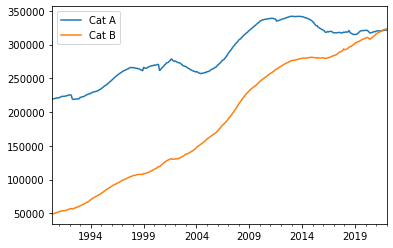

In [278]:
population_df = pd.read_csv("data/motor-vehicle-population.csv").T

population_df = population_df.iloc[:, [1,2]]
population_df = population_df[1:]
population_df.columns = ["Cat A", "Cat B"]
population_df.index =  pd.to_datetime(population_df.index)
population_df = population_df.applymap(convert_to_numeric)

print(population_df.plot())
population_df

Both categories increases in population over years, while Cat B experiences significantly higher percentage of increase since the start date

### Vehicle registration and deregistration

Registration and degistration data are combined as the net registration by taking the difference between registration and deregistration of each month

AxesSubplot(0.125,0.125;0.775x0.755)


,Net Registration Cat A,Net Registration Cat B
2022-01-01,-68.0,446.0
2021-12-01,94.0,529.0
2021-11-01,154.0,429.0
2021-10-01,227.0,144.0
2021-09-01,445.0,1163.0
...,...,...
1990-09-01,361.0,310.0
1990-08-01,327.0,359.0
1990-07-01,28.0,209.0
1990-06-01,398.0,303.0


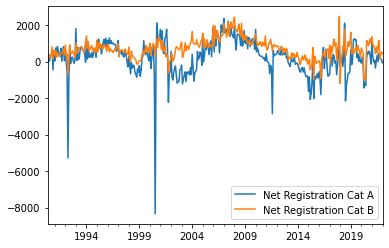

In [279]:
registration_df =  pd.read_csv("data/new-registration.csv").T

registration_df = registration_df.iloc[:, [1,2]]
registration_df = registration_df[1:]
registration_df.columns = ["Registration Cat A", "Registration Cat B"]
registration_df.index =  pd.to_datetime(registration_df.index)
registration_df = registration_df.applymap(convert_to_numeric)

deregistration_df =  pd.read_csv("data/deregistration.csv").T

deregistration_df = deregistration_df.iloc[:, [1,2]]
deregistration_df = deregistration_df[1:]
deregistration_df.columns = ["Cat A", "Cat B"]
deregistration_df.index =  pd.to_datetime(deregistration_df.index)
deregistration_df = deregistration_df.applymap(convert_to_numeric)

registration_df["Deregistration Cat A"] = deregistration_df["Cat A"]
registration_df["Deregistration Cat B"] = deregistration_df["Cat B"]
registration_df["Net Registration Cat A"] = registration_df["Registration Cat A"]- registration_df["Deregistration Cat A"]
registration_df["Net Registration Cat B"] = registration_df["Registration Cat B"]- registration_df["Deregistration Cat B"]
registration_df = registration_df[["Net Registration Cat A", "Net Registration Cat B"]]

print(registration_df.plot())
registration_df

#### Relationship between car population, net registration, quota and quota premium

In [291]:
# earliest month 2002 April, latest month 2022 Jan with complete data 

# filer population df
pop = population_df.loc["2002-04-01":"2022-01-01"]
reg = registration_df.loc["2002-04-01":"2022-01-01"]

# Cat A
A = bidding_results_df[5:]
A = A[A["Category"] == "A"]
A = A.groupby(pd.Grouper(key="Announcement Date", freq="1M")).agg({ "Quota":"sum", 
                                                                    "Quota Premium":"mean", 
                                                                    "Total Bids Received":"sum", 
                                                                    "Number of Successful Bids": "sum"
                                                                })
A = A.sort_values(by="Announcement Date", ascending=False)
A["Population"] = pop["Cat A"].to_list()
A["Net Registration"] = reg["Net Registration Cat A"].to_list()

# Cat B
B = bidding_results_df[5:]
B = B[B["Category"] == "B"]
B = B.groupby(pd.Grouper(key="Announcement Date", freq="1M")).agg({ "Quota":"sum", 
                                                                    "Quota Premium":"mean", 
                                                                    "Total Bids Received":"sum", 
                                                                    "Number of Successful Bids": "sum"
                                                                })
B = B.sort_values(by="Announcement Date", ascending=False)
B["Population"] = pop["Cat B"].to_list()
B["Net Registration"] = reg["Net Registration Cat B"].to_list()

In [292]:
print("Cat A")
cols = ["Quota Premium", "Population", "Net Registration", "Quota"]
corr = A[cols].corr()
corr.style.background_gradient(cmap='YlGnBu').set_precision(3)

Cat A


,Quota Premium,Population,Net Registration,Quota
Quota Premium,1.000,0.601,-0.523,-0.706
Population,0.601,1.000,-0.089,-0.671
Net Registration,-0.523,-0.089,1.000,0.396
Quota,-0.706,-0.671,0.396,1.000


In [293]:
print("Cat B")

cols = ["Quota Premium", "Population", "Net Registration", "Quota"]
corr = B[cols].corr()
corr.style.background_gradient(cmap='YlGnBu').set_precision(3)

Cat B


,Quota Premium,Population,Net Registration,Quota
Quota Premium,1.000,0.605,-0.600,-0.605
Population,0.605,1.000,-0.383,-0.135
Net Registration,-0.600,-0.383,1.000,0.349
Quota,-0.605,-0.135,0.349,1.000


1. Quota is positively related to net registration, though it is not a strong correlation
2. Quota premium is highly correlated to the vehicle population

### CPI

AxesSubplot(0.125,0.125;0.775x0.755)


,Transport CPI
2022-01-01,115.8
2021-12-01,115.7
2021-11-01,114.2
2021-10-01,111.2
2021-09-01,108.7
...,...
1961-05-01,20.5
1961-04-01,20.5
1961-03-01,20.5
1961-02-01,20.5


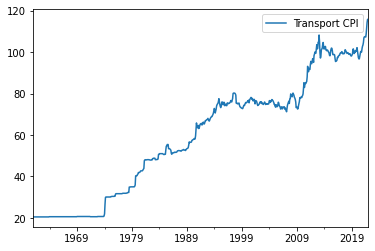

In [294]:
CPI_df = pd.read_csv("./data/CPI-transport.csv").T

CPI_df = CPI_df.iloc[:, [1]]
CPI_df = CPI_df[1:]
CPI_df.columns = ["Transport CPI"]
CPI_df.index =  pd.to_datetime(CPI_df.index)
CPI_df = CPI_df.applymap(convert_to_numeric)

print(CPI_df.plot())
CPI_df

#### Correlation between bidding information with transport CPI

In [296]:
cpi = CPI_df.loc["2002-04-01":"2022-01-01"]
cols = ["Transport CPI", "Quota", "Quota Premium"]

    Cat A

In [297]:
# Cat A
A = bidding_results_df[5:]
A = A[A["Category"] == "A"]
A = A.groupby(pd.Grouper(key="Announcement Date", freq="1M")).agg({ "Quota":"sum", 
                                                                    "Quota Premium":"mean", 
                                                                    "Total Bids Received":"sum", 
                                                                    "Number of Successful Bids": "sum"
                                                                })
A = A.sort_values(by="Announcement Date", ascending=False)
A["Transport CPI"] = cpi["Transport CPI"].to_list()
corr = A[cols].corr()
corr.style.background_gradient(cmap='YlGnBu').set_precision(3)

,Transport CPI,Quota,Quota Premium
Transport CPI,1.000,-0.599,0.799
Quota,-0.599,1.000,-0.706
Quota Premium,0.799,-0.706,1.000


    Cat B

In [298]:
# Cat A
B = bidding_results_df[5:]
B = B[B["Category"] == "B"]
B = B.groupby(pd.Grouper(key="Announcement Date", freq="1M")).agg({ "Quota":"sum", 
                                                                    "Quota Premium":"mean", 
                                                                    "Total Bids Received":"sum", 
                                                                    "Number of Successful Bids": "sum"
                                                                })
B = B.sort_values(by="Announcement Date", ascending=False)
B["Transport CPI"] = cpi["Transport CPI"].to_list()
corr = B[cols].corr()
corr.style.background_gradient(cmap='YlGnBu').set_precision(3)

,Transport CPI,Quota,Quota Premium
Transport CPI,1.000,-0.241,0.821
Quota,-0.241,1.000,-0.605
Quota Premium,0.821,-0.605,1.000


Quota premium is strongly correlated with transport CPI